In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 5.9 MB/s eta 0:00:00


# 데이터셋 로딩

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
# dir(cancer)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
data = cancer.data
target = cancer.target

df = pd.DataFrame(data, columns=cancer.feature_names)
df['target'] = target
X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
# 양성(1)유방암, 음성(0) 정상 데이터셋의 개수 파악 - 불균형한 데이터셋인지를 파악하기 위해
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [5]:
# 30개의 feature 확인
for i, feature in enumerate(cancer.feature_names):
  print(f'feature {i} : {feature}')

feature 0 : mean radius
feature 1 : mean texture
feature 2 : mean perimeter
feature 3 : mean area
feature 4 : mean smoothness
feature 5 : mean compactness
feature 6 : mean concavity
feature 7 : mean concave points
feature 8 : mean symmetry
feature 9 : mean fractal dimension
feature 10 : radius error
feature 11 : texture error
feature 12 : perimeter error
feature 13 : area error
feature 14 : smoothness error
feature 15 : compactness error
feature 16 : concavity error
feature 17 : concave points error
feature 18 : symmetry error
feature 19 : fractal dimension error
feature 20 : worst radius
feature 21 : worst texture
feature 22 : worst perimeter
feature 23 : worst area
feature 24 : worst smoothness
feature 25 : worst compactness
feature 26 : worst concavity
feature 27 : worst concave points
feature 28 : worst symmetry
feature 29 : worst fractal dimension


# Preprocessing

## train / test

In [7]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

## standarization(표준화)

In [8]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

# LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [10]:
# 훈련모델을 이용한 예측
lr.predict(train_scaled[:5])

array([1, 0, 1, 1, 1])

In [11]:
train_target[:5]

array([1, 0, 1, 1, 1])

- 악성종양(malignant) = 음성클래스 - 0
- 양성종양(benign) = 양성클래스 - 1
- 분류에서 우리가 찾고자 하는 값이 양성클래스이다.

In [15]:
# 예측확률
lr.predict_proba(train_scaled[:5])

array([[1.27395194e-01, 8.72604806e-01],
       [9.99999998e-01, 2.12452704e-09],
       [4.55094715e-06, 9.99995449e-01],
       [4.08096234e-02, 9.59190377e-01],
       [2.56532183e-05, 9.99974347e-01]])

In [16]:
# classes_: 분류할 클래스
lr.classes_

array([0, 1])

In [17]:
# 계수(가중치 - 기울기와 절편)
lr.coef_, lr.intercept_

(array([[-0.42789615, -0.39391343, -0.38955025, -0.46431618, -0.06675416,
          0.54210625, -0.79677127, -1.1170207 ,  0.23571257,  0.07670117,
         -1.27114722,  0.18863977, -0.60936581, -0.90979979, -0.31246106,
          0.68597229,  0.18081531, -0.31769168,  0.49997976,  0.61340541,
         -0.87861043, -1.3421883 , -0.58755707, -0.84655924, -0.54994459,
          0.00520705, -0.94571375, -0.77343621, -1.20853126, -0.1541604 ]]),
 array([0.44359695]))

In [20]:
# z값 출력
decisions = lr.decision_function(train_scaled[:5])
decisions

array([  1.92418875, -19.96971663,  12.30017063,   3.15717165,
        10.57081587])

In [42]:
# 예측
pred = lr.predict(test_scaled)

## 평가지표

- 회귀(regression): MAE, MSE, RMSE...
- 분류(classification): 정확도, 정밀도, 재현율(민감도), F1스코어, ROC커브곡선
- 군집화(clustering): DBI, 엘보우 메서드, 실루엣계수

In [43]:
# 정확도(Accuracy): 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단
# 이진분류일 경우 데이터의 불균형한 데이터셋일 경우 모델의 성능이 왜곡될 수 있다.
# 정확도 = 예측결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

from sklearn.metrics import accuracy_score
accuracy_score(test_target, pred)

0.9824561403508771

## 혼돈행렬(Confusion Matrix, 오차행렬)

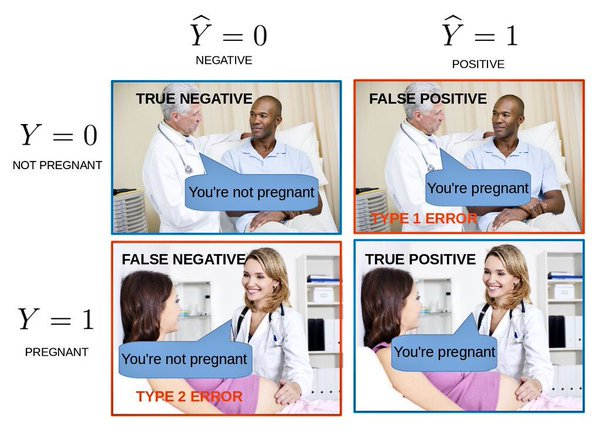

In [23]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=500)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, pred)
cm

array([[41,  2],
       [ 0, 71]])

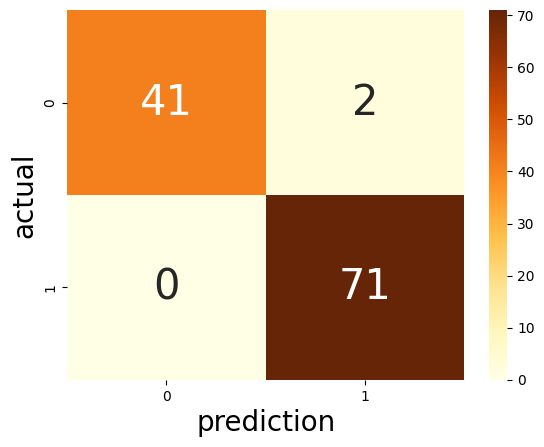

In [25]:
# 혼돈행렬 시각화
import seaborn as sns

sns.heatmap(cm, annot=True, annot_kws={'size': 30}, cmap='YlOrBr')
plt.xlabel('prediction', fontsize=20)
plt.ylabel('actual', fontsize=20)
plt.show()

In [35]:
TN, FP, FN, TP = cm.ravel()

## 정밀도(Precision)
- Positive로 예측한 전체 건수에서 옳게 예측한 건수의 비율

In [44]:
from sklearn.metrics import precision_score
precision = TP / (FP + TP)
precision

0.9726027397260274

In [37]:
precision_score(test_target, pred)

0.9726027397260274

## 재현율(Recall, 민감도)
- 실제 Positive인 전체 건수에서 옳게 예측한 건수의 비율
- TPR(True Positive Rate)

In [45]:
recall = TP / (FN + TP)
recall

1.0

In [40]:
from sklearn.metrics import recall_score
recall_score(test_target, pred)

1.0

## F1 score
- 재현율과 정밀도를 조화롭게 나타내는 수치

In [41]:
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.9861111111111112

In [46]:
from sklearn.metrics import f1_score
f1_score(test_target, pred)

0.9861111111111112

# XGBClassifier

In [47]:
cancer = load_breast_cancer()

data = cancer.data
target = cancer.target

## train / test

In [48]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# 검증세트 10%
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [49]:
print(x_train.shape, x_test.shape)
print(x_tr.shape, x_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [50]:
import xgboost as xgb

In [51]:
# 학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data = x_tr, label=y_tr)
dval = xgb.DMatrix(data=x_val, label=y_val)
dtest = xgb.DMatrix(data = x_test, label=y_test)

In [52]:
params = {
    'max_depth':3,
    'eta':0.05,
    'objective':'binary:logistic',
    'eval_metrix':'logloss'
}
num_rounds = 400

In [53]:
# 학습 데이터셋은 'train', 평가 데이터셋은 'eval'
eval_list = [(dtr, 'train'), (dval, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtr, num_boost_round=num_rounds, early_stopping_rounds=50, evals=eval_list)
xgb_model

[0]	train-logloss:0.62061	eval-logloss:0.61040
[1]	train-logloss:0.58359	eval-logloss:0.57564
[2]	train-logloss:0.55009	eval-logloss:0.54327
[3]	train-logloss:0.51925	eval-logloss:0.51391
[4]	train-logloss:0.49088	eval-logloss:0.48514
[5]	train-logloss:0.46459	eval-logloss:0.45974
[6]	train-logloss:0.44095	eval-logloss:0.43778
[7]	train-logloss:0.41868	eval-logloss:0.41535
[8]	train-logloss:0.39788	eval-logloss:0.39538
[9]	train-logloss:0.37902	eval-logloss:0.37811
[10]	train-logloss:0.36101	eval-logloss:0.36150
[11]	train-logloss:0.34428	eval-logloss:0.34771
[12]	train-logloss:0.32859	eval-logloss:0.33181
[13]	train-logloss:0.31346	eval-logloss:0.31602
[14]	train-logloss:0.29970	eval-logloss:0.30430
[15]	train-logloss:0.28682	eval-logloss:0.29124
[16]	train-logloss:0.27429	eval-logloss:0.27807
[17]	train-logloss:0.26285	eval-logloss:0.26855
[18]	train-logloss:0.25216	eval-logloss:0.25775
[19]	train-logloss:0.24180	eval-logloss:0.24890
[20]	train-logloss:0.23236	eval-logloss:0.23987
[2

In [54]:
pred_probs = xgb_model.predict(dtest)
# 수행 결과값을 10개만 표시, 예측 확률값으로 표시
np.round(pred_probs[:10], 3)

array([0.991, 0.001, 0.001, 1.   , 1.   , 0.001, 0.001, 0.141, 0.152,
       1.   ], dtype=float32)

In [55]:
# 예측 분류
preds = [1 if x > 0.5 else 0 for x in pred_probs]
preds[:10]

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1]

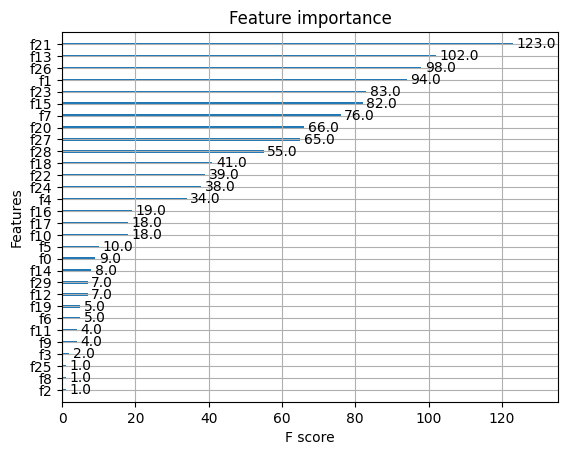

In [57]:
from xgboost import plot_importance

plot_importance(xgb_model)
plt.show()

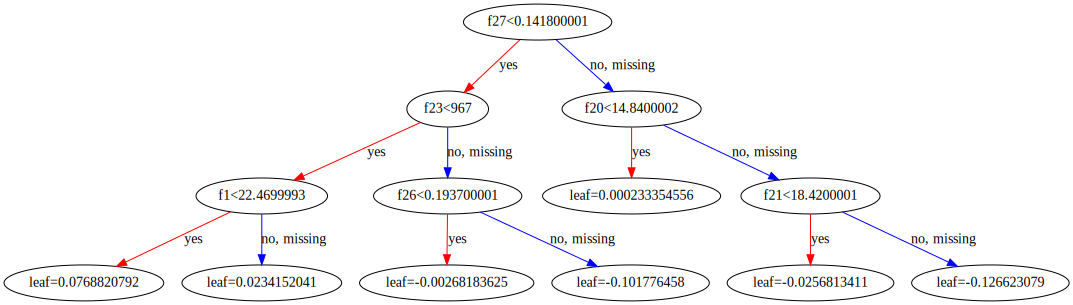

In [56]:
from xgboost import to_graphviz
import graphviz

to_graphviz(xgb_model)

In [58]:
xgb.cv(params=params, dtrain=dtr, num_boost_round=10, nfold=3, metrics='logloss')

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.619568,0.013264,0.630101,0.024868
1,0.582667,0.013955,0.595834,0.024259
2,0.548744,0.013980,0.565507,0.023863
3,0.517904,0.013903,0.537764,0.023357
4,0.489719,0.013792,0.512438,0.022969
5,0.463759,0.014105,0.489268,0.023941
6,0.439938,0.013857,0.468952,0.024825
7,0.417543,0.013747,0.449205,0.024796
8,0.396694,0.013572,0.432446,0.025934
9,0.377624,0.013458,0.416094,0.026563


In [59]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [60]:
from xgboost import XGBClassifier

xgb2 = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth= 3)
xgb2.fit(x_train, y_train)

xgb2_pred = xgb2.predict(x_test)
xgb2_pred_proba = xgb2.predict_proba(x_test)[:, 1]

In [61]:
# 래퍼 클래스 wrapper, wrapping, int(), list()
# XGB 조기 중단
xgb_w = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

# eval_set
evals = [(x_test, y_test)]

# 조기 중단 지정
# verbose=True: 상세한 정보 출력
xgb_w.fit(x_train, y_train,
          early_stopping_rounds=100,
          eval_metric = 'logloss',
          eval_set = evals,
          verbose=True)

[0]	validation_0-logloss:0.58740
[1]	validation_0-logloss:0.52275
[2]	validation_0-logloss:0.47235
[3]	validation_0-logloss:0.42765
[4]	validation_0-logloss:0.38913
[5]	validation_0-logloss:0.35715
[6]	validation_0-logloss:0.33209
[7]	validation_0-logloss:0.30697
[8]	validation_0-logloss:0.28488
[9]	validation_0-logloss:0.26528
[10]	validation_0-logloss:0.24982
[11]	validation_0-logloss:0.23678
[12]	validation_0-logloss:0.22303
[13]	validation_0-logloss:0.21039
[14]	validation_0-logloss:0.20074
[15]	validation_0-logloss:0.19130
[16]	validation_0-logloss:0.17893
[17]	validation_0-logloss:0.17262
[18]	validation_0-logloss:0.16728
[19]	validation_0-logloss:0.15980
[20]	validation_0-logloss:0.15591
[21]	validation_0-logloss:0.15278
[22]	validation_0-logloss:0.14559
[23]	validation_0-logloss:0.14165
[24]	validation_0-logloss:0.13924
[25]	validation_0-logloss:0.13493
[26]	validation_0-logloss:0.13142
[27]	validation_0-logloss:0.13052
[28]	validation_0-logloss:0.12751
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

**민감하게 조정해야 하는 파라미터**
- booster 모양: 회귀(regression)
- eval_metric(평가함수) / objectiv(목적함수)
- L1 / L2

**과적합 방지를 위해 조정해야하는 것**
- learning_rate 낮추기, n_estimators 높이기
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기